In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [123]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/COALINDIA.csv")

In [124]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2010-11-04,COALINDIA,EQ,245.00,291.00,344.9,291.00,342.0,342.55,327.29,479716245,1.570040e+16,NaN,187584905,0.3910
1,2010-11-05,COALINDIA,EQ,342.55,343.00,356.5,343.00,348.3,349.85,349.78,31927173,1.116747e+15,NaN,10894509,0.3412
2,2010-11-08,COALINDIA,EQ,349.85,351.80,355.9,329.50,331.4,330.75,335.19,46932779,1.573118e+15,NaN,16651623,0.3548
3,2010-11-09,COALINDIA,EQ,330.75,330.15,333.4,325.00,325.4,326.05,327.75,23741956,7.781383e+14,NaN,12977359,0.5466
4,2010-11-10,COALINDIA,EQ,326.05,325.40,327.8,320.05,321.3,322.80,323.78,21057129,6.817982e+14,NaN,6280335,0.2983


In [125]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2598 non-null   object 
 1   Symbol              2598 non-null   object 
 2   Series              2598 non-null   object 
 3   Prev Close          2598 non-null   float64
 4   Open                2598 non-null   float64
 5   High                2598 non-null   float64
 6   Low                 2598 non-null   float64
 7   Last                2598 non-null   float64
 8   Close               2598 non-null   float64
 9   VWAP                2598 non-null   float64
 10  Volume              2598 non-null   int64  
 11  Turnover            2598 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  2598 non-null   int64  
 14  %Deliverble         2598 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 304.6

In [126]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2.598000e+03,2.598000e+03,2456.000000,2.598000e+03,2598.000000
mean,287.996555,288.234007,291.891744,284.240878,287.950943,287.953464,288.095708,5.617118e+06,1.405398e+14,53493.838355,2.783658e+06,0.551006
std,74.086926,74.132769,75.064219,73.238459,74.098662,74.144478,74.181016,1.105497e+07,3.292618e+14,30508.369833,4.497473e+06,0.143522
min,110.550000,110.850000,112.450000,109.550000,110.600000,110.550000,110.500000,2.143700e+04,7.734786e+11,612.000000,1.078600e+04,0.146300
25%,254.087500,254.737500,257.012500,251.187500,254.325000,254.087500,254.312500,2.236566e+06,6.921541e+13,33748.750000,1.240880e+06,0.456325
50%,299.950000,300.100000,303.925000,295.950000,300.000000,299.950000,300.290000,3.471441e+06,1.032340e+14,46755.000000,1.975260e+06,0.567700
75%,341.637500,341.200000,345.462500,336.137500,341.825000,341.637500,340.667500,6.321588e+06,1.596711e+14,64106.500000,3.233135e+06,0.654275
max,443.400000,445.000000,447.100000,437.000000,443.900000,443.400000,441.930000,4.797162e+08,1.570040e+16,351215.000000,1.875849e+08,0.936100


In [127]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [128]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [129]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [130]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [131]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [132]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [133]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
2593,1.185771,-0.626223,126.95,4967884,NaN
2594,1.026856,0.393701,127.50,3982954,NaN
2595,1.529412,0.390625,128.50,6206074,NaN
2596,1.880141,-1.310212,128.05,8345584,NaN
2597,5.984252,4.434851,133.05,27396950,NaN


In [134]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_17924\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [135]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [136]:
#Define the prediction model
model = RandomForestRegressor()

In [137]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [138]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.8817653607334114


In [139]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [140]:
predictions = model.predict(X_Check)

In [141]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

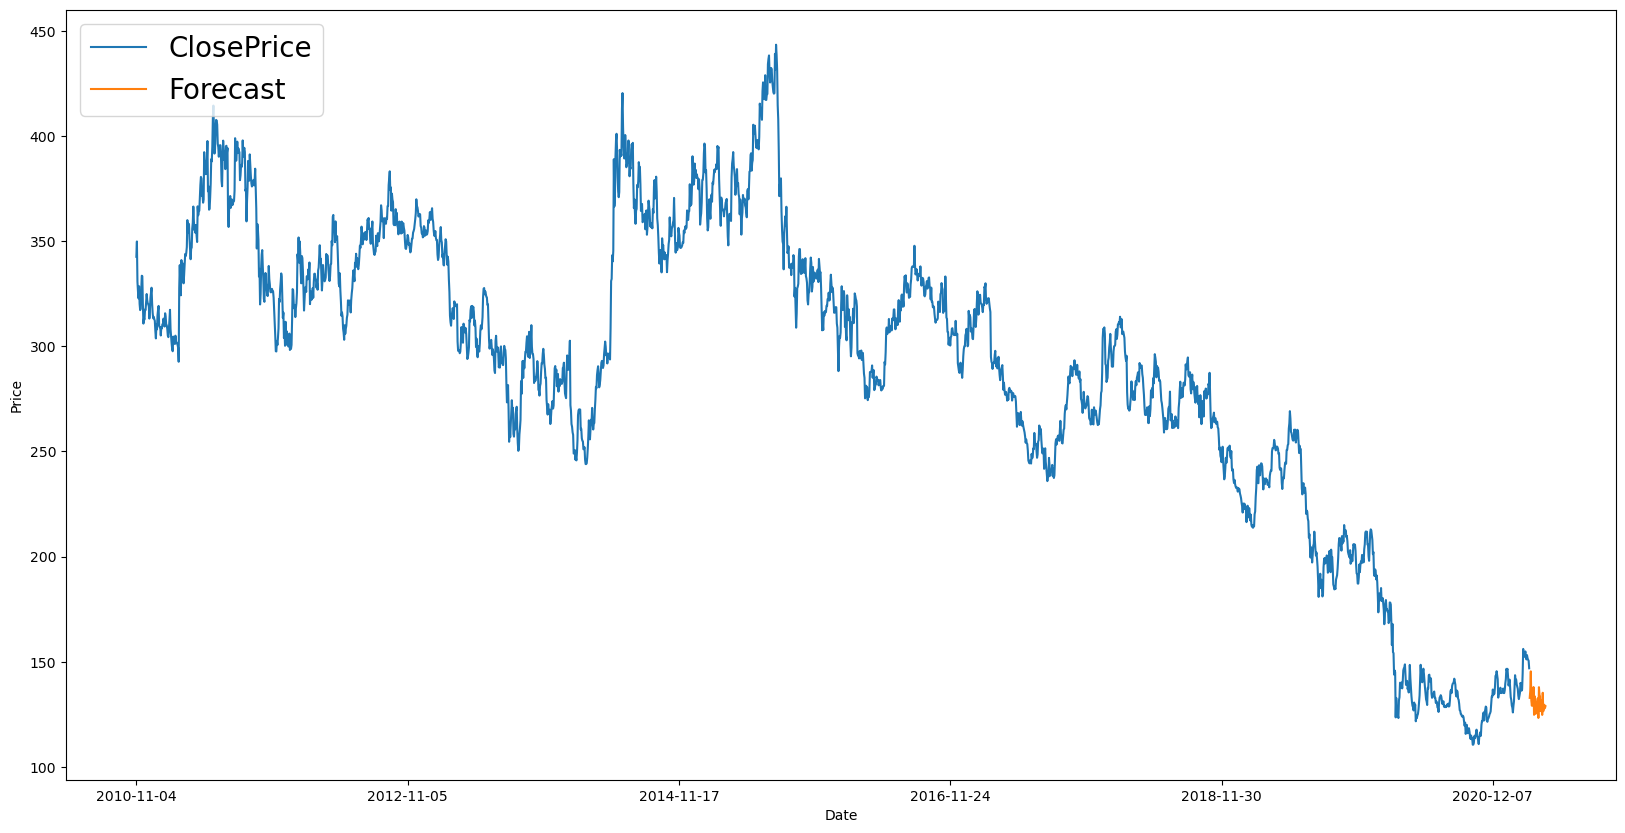

In [142]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')